In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
sns.set_theme()
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier, plot_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [29]:
df1 = pd.read_csv('/Users/butler/Documents/hp/relax_challenge/takehome_user_engagement.csv')

In [30]:
df = pd.read_excel('/Users/butler/Documents/hp/relax_challenge/takehome_users.xlsx')

In [31]:
df1.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [32]:
df1.shape

(207917, 3)

In [33]:
df1.user_id.nunique()

8823

In [34]:
df1.tail()

,time_stamp,user_id,visited
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1
207916,2014-01-26 08:57:12,12000,1


In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [36]:
df1[df1.user_id == 8]

,time_stamp,user_id,visited


In [37]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [38]:
df.tail(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
11990,11991,2014-04-20 14:22:45,Vaughn Arthur,ArthurJVaughn@gmail.com,SIGNUP_GOOGLE_AUTH,1.401460e+09,0,0,388,NaN
11991,11992,2014-04-09 19:39:56,Hermansen Amanda,AmandaAHermansen@yahoo.com,PERSONAL_PROJECTS,1.397245e+09,0,0,129,NaN
11992,11993,2013-03-28 23:24:21,Townsend Isabel,IsabelTownsend@cuvox.de,PERSONAL_PROJECTS,NaN,0,0,281,NaN
11993,11994,2012-06-05 04:46:16,Grimstone Joel,conxzghp@eaouk.com,GUEST_INVITE,NaN,0,0,84,5450.0
11994,11995,2013-10-21 13:33:17,Werfel Sebastian,SebastianWerfel@gmail.com,PERSONAL_PROJECTS,1.382449e+09,0,0,0,NaN
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN
11999,12000,2014-01-26 08:57:12,Lima ThaÌs,ThaisMeloLima@hotmail.com,SIGNUP,1.390727e+09,0,1,0,NaN


In [39]:
df

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [40]:
df1[df1.user_id == 8]

,time_stamp,user_id,visited


In [41]:
df2 = df1.groupby('user_id').sum(numeric_only=True)

In [42]:
df2.head(20)

,visited
user_id,
1,1
2,14
3,1
4,1
5,1
6,1
7,1
10,284
11,1


In [43]:
df2.tail()

,visited
user_id,
11996,1
11997,1
11998,1
11999,1
12000,1


In [44]:
df2 = df2.reset_index()

In [45]:
df2.head()

,user_id,visited
0,1,1
1,2,14
2,3,1
3,4,1
4,5,1


In [46]:
df2.user_id.nunique()

8823

In [47]:
df2.tail()

,user_id,visited
8818,11996,1
8819,11997,1
8820,11998,1
8821,11999,1
8822,12000,1


In [48]:
df10 = df2.copy()

In [49]:
df10.tail()

,user_id,visited
8818,11996,1
8819,11997,1
8820,11998,1
8821,11999,1
8822,12000,1


In [50]:
df10.head()

,user_id,visited
0,1,1
1,2,14
2,3,1
3,4,1
4,5,1


In [51]:
df10.tail()

,user_id,visited
8818,11996,1
8819,11997,1
8820,11998,1
8821,11999,1
8822,12000,1


In [52]:
df10.user_id.nunique()

8823

In [53]:
df10.visited

0        1
1       14
2        1
3        1
4        1
        ..
8818     1
8819     1
8820     1
8821     1
8822     1
Name: visited, Length: 8823, dtype: int64

In [54]:
df['number_logins'] = df10.visited.astype(int)

In [55]:
df.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,number_logins
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,14.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,1.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,1.0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,284.0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,1.0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1.0


In [56]:
df.tail()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,number_logins
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,NaN
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,NaN
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,NaN
11999,12000,2014-01-26 08:57:12,Lima ThaÌs,ThaisMeloLima@hotmail.com,SIGNUP,1.390727e+09,0,1,0,NaN,NaN


In [57]:
df2 = df2.drop(df2[df2.visited < 3].index)

In [58]:
df2.head()

,user_id,visited
1,2,14
7,10,284
13,20,7
24,33,18
28,42,342


In [59]:
df2 = df2.reset_index()

In [60]:
df2.head()

,index,user_id,visited
0,1,2,14
1,7,10,284
2,13,20,7
3,24,33,18
4,28,42,342


In [61]:
df2.shape

(2248, 3)

In [62]:
a = df2['user_id']
a.shape

(2248,)

In [63]:
df1.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [64]:
df1 = df1[df1.user_id.isin(df2.user_id)]

In [65]:
df1.head()

,time_stamp,user_id,visited
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1


In [66]:
(df1.user_id == 2).value_counts()

False    200988
True         14
Name: user_id, dtype: int64

In [67]:
df1.tail()

,time_stamp,user_id,visited
207905,2014-04-20 14:22:45,11991,1
207906,2014-04-25 14:22:45,11991,1
207907,2014-04-28 14:22:45,11991,1
207908,2014-05-17 14:22:45,11991,1
207909,2014-05-30 14:22:45,11991,1


In [68]:
df1.time_stamp.max()

'2014-06-04 23:56:26'

In [69]:
df1.time_stamp.min()

'2012-05-31 15:47:36'

In [70]:
df1.user_id.nunique()

2248

In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201002 entries, 1 to 207909
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  201002 non-null  object
 1   user_id     201002 non-null  int64 
 2   visited     201002 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.1+ MB


In [72]:
df1.time_stamp = pd.to_datetime(df1.time_stamp)

In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201002 entries, 1 to 207909
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  201002 non-null  datetime64[ns]
 1   user_id     201002 non-null  int64         
 2   visited     201002 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 6.1 MB


In [74]:
df1.head()

,time_stamp,user_id,visited
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1


In [75]:
#df1a = pd.melt(df1, id_vars=['user_id'], value_vars=['time_stamp', 'visited'])

In [76]:
#df1a.head()

In [77]:
#df1a = df1.pivot(index='user_id', columns='time_stamp', values='time_stamp')

In [ ]:
df1.groupby('user_id')

In [131]:
df1a.shape

NameError: name 'df1a' is not defined

In [79]:
print(userid_series)

NameError: name 'userid_series' is not defined

In [ ]:
df1a = df1a.diff(periods=2, axis=1)

In [ ]:
#df2a = df1.diff()

In [132]:
df2a.head()

NameError: name 'df2a' is not defined

In [108]:
df2 = df1.time_stamp.diff()

In [109]:
df2.head()

1       NaT
2   14 days
3   10 days
4   16 days
5    6 days
Name: time_stamp, dtype: timedelta64[ns]

In [110]:
type(df2)

pandas.core.series.Series

In [111]:
user_id = df1.user_id

In [112]:
df3 = pd.DataFrame()

In [113]:
df3['time_diff'] = df2

In [114]:
df3['user_id'] = user_id

In [115]:
df3.head()

,time_diff,user_id
1,NaT,2
2,14 days,2
3,10 days,2
4,16 days,2
5,6 days,2


In [116]:
df2 = df1.time_stamp.diff(periods=2)

In [117]:
df3['time_diff'] = df2

In [118]:
df3['time_stamp'] = df1.time_stamp

In [119]:
df3.head()

,time_diff,user_id,time_stamp
1,NaT,2,2013-11-15 03:45:04
2,NaT,2,2013-11-29 03:45:04
3,24 days,2,2013-12-09 03:45:04
4,26 days,2,2013-12-25 03:45:04
5,22 days,2,2013-12-31 03:45:04


In [120]:
df3.tail()

,time_diff,user_id,time_stamp
207905,-37 days +03:17:58,11991,2014-04-20 14:22:45
207906,-37 days +03:17:58,11991,2014-04-25 14:22:45
207907,8 days 00:00:00,11991,2014-04-28 14:22:45
207908,22 days 00:00:00,11991,2014-05-17 14:22:45
207909,32 days 00:00:00,11991,2014-05-30 14:22:45


In [122]:
userid_series = df3.user_id.unique()
userid_series

array([    2,    10,    20, ..., 11981, 11988, 11991])

In [123]:
type(userid_series)

numpy.ndarray

In [124]:
(df3.user_id == 2).value_counts()

False    200988
True         14
Name: user_id, dtype: int64

In [125]:
df3['days_diff'] = df3['time_diff'] / pd.to_timedelta(1, unit='D')

In [126]:
df3.head()

,time_diff,user_id,time_stamp,days_diff
1,NaT,2,2013-11-15 03:45:04,NaN
2,NaT,2,2013-11-29 03:45:04,NaN
3,24 days,2,2013-12-09 03:45:04,24.0
4,26 days,2,2013-12-25 03:45:04,26.0
5,22 days,2,2013-12-31 03:45:04,22.0


In [128]:
df4 = df3[df3.days_diff < 0]

In [129]:
df4.head()

,time_diff,user_id,time_stamp,days_diff
20,-421 days +18:22:59,10,2013-01-16 22:08:03,-420.234039
21,-433 days +18:22:59,10,2013-01-22 22:08:03,-432.234039
310,-84 days +13:38:35,20,2014-03-11 11:46:38,-83.431539
311,-84 days +13:38:35,20,2014-03-12 11:46:38,-83.431539
328,-79 days +18:42:31,33,2014-03-11 06:29:09,-78.220475


In [130]:
df4.shape

(3665, 4)

In [127]:
df3.user_id.value_counts()

3623     606
906      600
1811     593
7590     590
8068     585
        ... 
10429      3
5575       3
5577       3
5589       3
6045       3
Name: user_id, Length: 2248, dtype: int64

In [62]:
df3.isnull().value_counts()

time_diff  user_id  days_diff
False      False    False        201000
True       False    True              2
dtype: int64

In [63]:
df3 = df3.dropna()

In [64]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201000 entries, 3 to 207909
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype          
---  ------     --------------   -----          
 0   time_diff  201000 non-null  timedelta64[ns]
 1   user_id    201000 non-null  int64          
 2   days_diff  201000 non-null  float64        
dtypes: float64(1), int64(1), timedelta64[ns](1)
memory usage: 6.1 MB


In [65]:
df3.isnull().value_counts()

time_diff  user_id  days_diff
False      False    False        201000
dtype: int64

In [66]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201000 entries, 3 to 207909
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype          
---  ------     --------------   -----          
 0   time_diff  201000 non-null  timedelta64[ns]
 1   user_id    201000 non-null  int64          
 2   days_diff  201000 non-null  float64        
dtypes: float64(1), int64(1), timedelta64[ns](1)
memory usage: 6.1 MB


In [67]:
df3.days_diff = df3.days_diff.astype(int)

In [68]:
df3.head()

,time_diff,user_id,days_diff
3,24 days,2,24
4,26 days,2,26
5,22 days,2,22
6,14 days,2,14
7,34 days,2,34


In [69]:
df3.tail()

,time_diff,user_id,days_diff
207905,-37 days +03:17:58,11991,-36
207906,-37 days +03:17:58,11991,-36
207907,8 days 00:00:00,11991,8
207908,22 days 00:00:00,11991,22
207909,32 days 00:00:00,11991,32


In [70]:
df4 = df3[df3.days_diff <=7]

In [71]:
df4.head()

,time_diff,user_id,days_diff
9,6 days 00:00:00,2,6
10,5 days 00:00:00,2,5
11,7 days 00:00:00,2,7
20,-421 days +18:22:59,10,-420
21,-433 days +18:22:59,10,-432


In [72]:
df4 = df4[df4.days_diff >= 0]

In [73]:
df4.head()

,time_diff,user_id,days_diff
9,6 days,2,6
10,5 days,2,5
11,7 days,2,7
24,7 days,10,7
27,5 days,10,5


In [74]:
adopted_users = df4.user_id[np.diff(df4.user_id, prepend=np.nan).astype(bool)]

In [75]:
adopted_users

9             2
24           10
312          20
331          33
353          42
          ...  
207456    11965
207468    11967
207508    11969
207649    11975
207875    11988
Name: user_id, Length: 1665, dtype: int64

In [ ]:
adopted_users = list(adopted_users)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.drop(['last_session_creation_time', 'object_id', 'name', 'email'], axis=1, inplace=True)

In [ ]:
df['year_created'] = df['creation_time'].dt.year

In [ ]:
df.invited_by_user_id = df.invited_by_user_id.fillna(0)

In [638]:
df.number_logins = df.number_logins.fillna(0)

AttributeError: 'DataFrame' object has no attribute 'number_logins'

In [509]:
df.number_logins.isnull().value_counts()

False    8823
True     3177
Name: number_logins, dtype: int64

In [510]:
df[df.number_logins.isnull()]

,creation_time,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,number_logins,year_created
8823,2013-10-02 14:29:55,ORG_INVITE,0,0,153,10755,NaN,2013
8824,2013-09-26 05:11:14,SIGNUP_GOOGLE_AUTH,0,0,163,0,NaN,2013
8825,2013-09-05 07:17:59,SIGNUP_GOOGLE_AUTH,0,0,413,0,NaN,2013
8826,2013-11-07 11:33:38,SIGNUP,0,0,319,0,NaN,2013
8827,2013-09-13 23:00:54,PERSONAL_PROJECTS,0,0,6,0,NaN,2013
...,...,...,...,...,...,...,...,...
11995,2013-09-06 06:14:15,ORG_INVITE,0,0,89,8263,NaN,2013
11996,2013-01-10 18:28:37,SIGNUP_GOOGLE_AUTH,0,0,200,0,NaN,2013
11997,2014-04-27 12:45:16,GUEST_INVITE,1,1,83,8074,NaN,2014
11998,2012-05-31 11:55:59,PERSONAL_PROJECTS,0,0,6,0,NaN,2012


In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   creation_time               12000 non-null  datetime64[ns]
 1   creation_source             12000 non-null  object        
 2   opted_in_to_mailing_list    12000 non-null  int64         
 3   enabled_for_marketing_drip  12000 non-null  int64         
 4   org_id                      12000 non-null  int64         
 5   invited_by_user_id          12000 non-null  float64       
 6   number_logins               8823 non-null   float64       
 7   year_created                12000 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 750.1+ KB


In [507]:
df.invited_by_user_id = df.invited_by_user_id.astype(int)

In [80]:
df.number_logins = df.number_logins.astype

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  number_logins               12000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)


In [82]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,number_logins
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,<bound method NDFrame.astype of 0 1.0\...
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,<bound method NDFrame.astype of 0 1.0\...
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,<bound method NDFrame.astype of 0 1.0\...
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,<bound method NDFrame.astype of 0 1.0\...
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,<bound method NDFrame.astype of 0 1.0\...


In [84]:
adopted_u = []
for i in range(1,12001):
    if i in adopted_u:
        adopted_u.append(1)
    else:
        adopted_u.append(0)

In [85]:
adopted_u = pd.Series(adopted_u)

In [86]:
type(adopted_u)

pandas.core.series.Series

In [87]:
df['adopted'] = adopted_u

In [88]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,number_logins,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,<bound method NDFrame.astype of 0 1.0\...,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,<bound method NDFrame.astype of 0 1.0\...,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,<bound method NDFrame.astype of 0 1.0\...,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,<bound method NDFrame.astype of 0 1.0\...,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,<bound method NDFrame.astype of 0 1.0\...,0


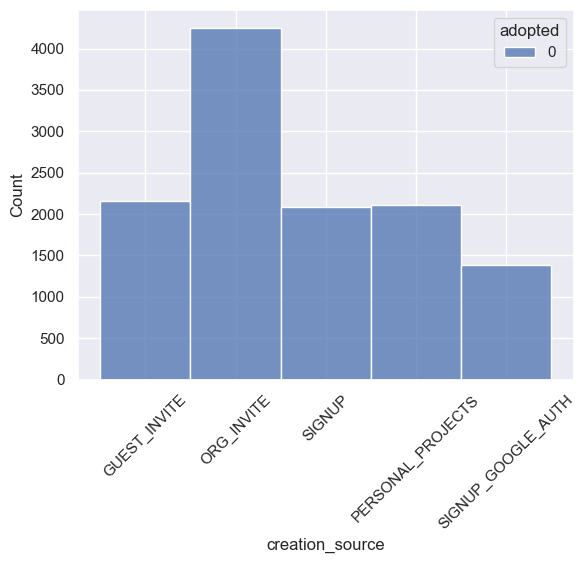

In [89]:
_ = sns.histplot(data=df, x='creation_source', hue='adopted', multiple='stack')
_ = plt.xticks(rotation=45)

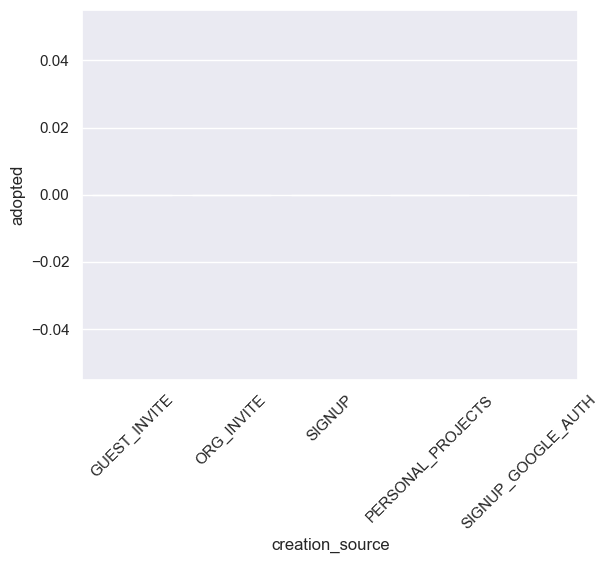

In [90]:
_ = sns.barplot(df, y='adopted', x='creation_source', errorbar='ci')
_ = plt.xticks(rotation=45)

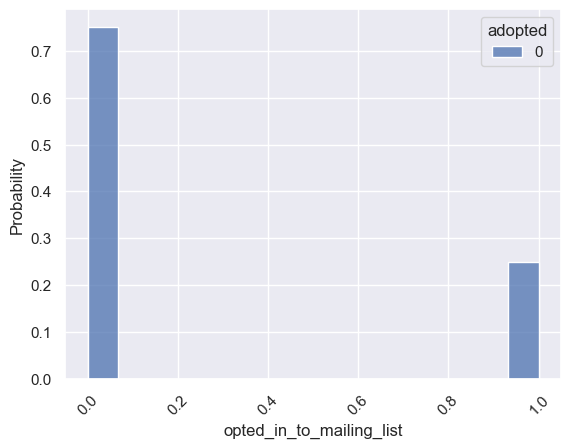

In [91]:
_ = sns.histplot(data=df, x='opted_in_to_mailing_list', hue='adopted', stat='probability', multiple='stack')
_ = plt.xticks(rotation=45)

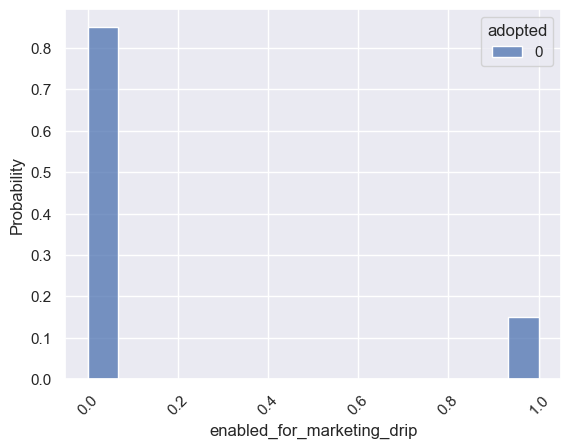

In [92]:
_ = sns.histplot(data=df, x='enabled_for_marketing_drip', hue='adopted', stat='probability', multiple='stack')
_ = plt.xticks(rotation=45)

In [93]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,number_logins,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,<bound method NDFrame.astype of 0 1.0\...,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,<bound method NDFrame.astype of 0 1.0\...,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,<bound method NDFrame.astype of 0 1.0\...,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,<bound method NDFrame.astype of 0 1.0\...,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,<bound method NDFrame.astype of 0 1.0\...,0


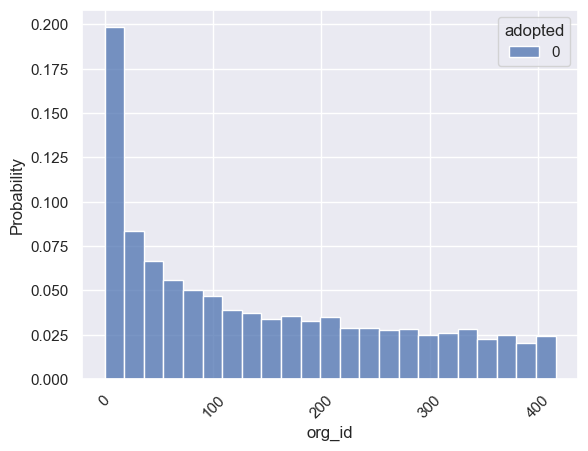

In [94]:
_ = sns.histplot(data=df, x='org_id', hue='adopted', stat='probability', multiple='stack')
_ = plt.xticks(rotation=45)

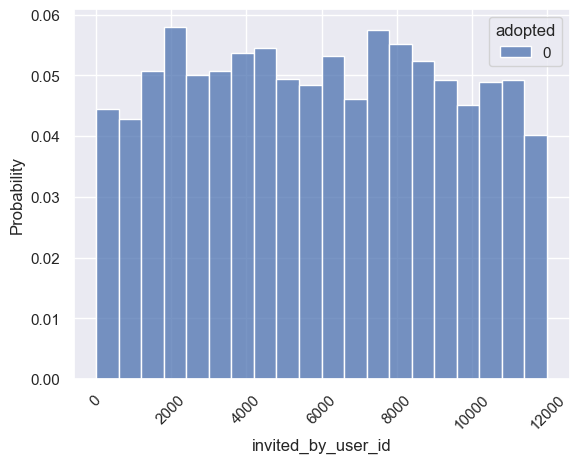

In [95]:
_ = sns.histplot(data=df, x='invited_by_user_id', hue='adopted', stat='probability', multiple='stack')
_ = plt.xticks(rotation=45)

In [96]:
df.org_id.isnull().value_counts()

False    12000
Name: org_id, dtype: int64

In [97]:
def get_invited(invited_by_user_id):
    if invited_by_user_id > 0:
        return 1
    else:
        return 0
  

In [98]:
df['invited'] = df['invited_by_user_id'].apply(get_invited)

In [99]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,number_logins,adopted,invited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,<bound method NDFrame.astype of 0 1.0\...,0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,<bound method NDFrame.astype of 0 1.0\...,0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,<bound method NDFrame.astype of 0 1.0\...,0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,<bound method NDFrame.astype of 0 1.0\...,0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,<bound method NDFrame.astype of 0 1.0\...,0,1


In [100]:
df.invited.value_counts()

1    6417
0    5583
Name: invited, dtype: int64

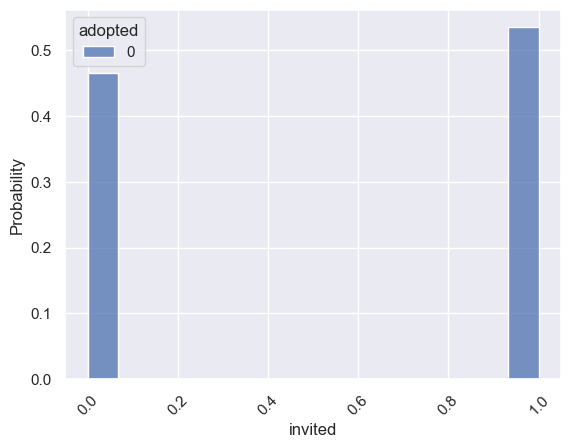

In [101]:
_ = sns.histplot(data=df, x='invited', hue='adopted', stat='probability', multiple='stack')
_ = plt.xticks(rotation=45)

In [103]:
_ = sns.histplot(data=dff, x='invited_by_user_id', hue='adopted', stat='probability', multiple='stack')
_ = plt.xticks(rotation=45)

NameError: name 'diff' is not defined

In [105]:

if df.invited_by_user_id > 0: 
    df['invite']  = 1 
else:
    df['invite'] = 0

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [1384]:
dff.head()

,object_id,creation_time,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
6,7,2012-12-16 13:24:32,SIGNUP,0,1,37,0,0
7,8,2013-07-31 05:34:02,PERSONAL_PROJECTS,1,1,74,0,0
8,9,2013-11-05 04:04:24,PERSONAL_PROJECTS,0,0,302,0,0
10,11,2013-12-26 03:55:54,SIGNUP,0,0,69,0,0
13,14,2012-10-11 16:14:33,SIGNUP,0,0,0,0,0


In [1393]:
a = pd.Series(dff['adopted'])
type(a)

pandas.core.series.Series

In [1397]:
a

6        0
7        0
8        0
10       0
13       0
        ..
11992    0
11994    0
11996    0
11998    0
11999    0
Name: adopted, Length: 5583, dtype: int64

In [1396]:
a.value_counts()

0    4863
1     720
Name: adopted, dtype: int64

In [1402]:
dfi = df.copy()

In [1403]:
dfi['adopt'] = a

In [1404]:
dfi['invited'] = df.invited_by_user_id

,object_id,creation_time,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,adopt
0,1,2014-04-22 03:53:30,GUEST_INVITE,1,0,11,10803,0,NaN
1,2,2013-11-15 03:45:04,ORG_INVITE,0,0,1,316,1,NaN
2,3,2013-03-19 23:14:52,ORG_INVITE,0,0,94,1525,0,NaN
3,4,2013-05-21 08:09:28,GUEST_INVITE,0,0,1,5151,0,NaN
4,5,2013-01-17 10:14:20,GUEST_INVITE,0,0,193,5240,0,NaN


In [1398]:
_ = sns.histplot(x='a', stat='probability', multiple='stack')
_ = plt.xticks(rotation=45)

ValueError: Could not interpret value `a` for parameter `x`

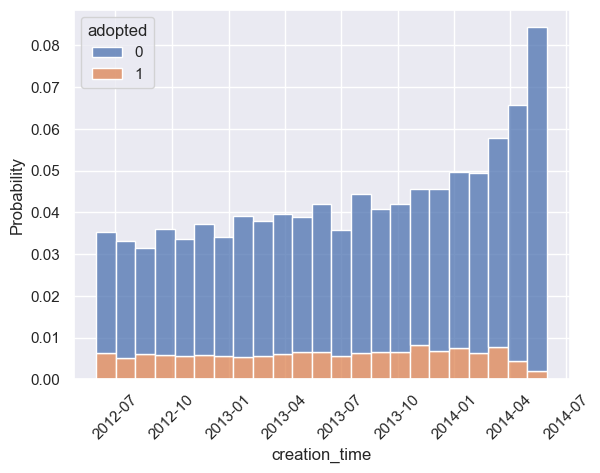

In [1280]:
_ = sns.histplot(data=df, x='creation_time', hue='adopted', stat='probability', multiple='stack')
_ = plt.xticks(rotation=45)

In [1282]:
df['month_created']=df['creation_time'].dt.month
df['year_created']=df['creation_time'].dt.year
df['day_created']=df['creation_time'].dt.day

In [1283]:
df.drop(['creation_time', 'object_id'], axis=1, inplace=True)

In [1284]:
df = pd.get_dummies(df)

In [1285]:
df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,month_created,year_created,day_created,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,10803,0,4,2014,22,1,0,0,0,0
1,0,0,1,316,1,11,2013,15,0,1,0,0,0
2,0,0,94,1525,0,3,2013,19,0,1,0,0,0
3,0,0,1,5151,0,5,2013,21,1,0,0,0,0
4,0,0,193,5240,0,1,2013,17,1,0,0,0,0


In [1286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   opted_in_to_mailing_list            12000 non-null  int64
 1   enabled_for_marketing_drip          12000 non-null  int64
 2   org_id                              12000 non-null  int64
 3   invited_by_user_id                  12000 non-null  int64
 4   adopted                             12000 non-null  int64
 5   month_created                       12000 non-null  int64
 6   year_created                        12000 non-null  int64
 7   day_created                         12000 non-null  int64
 8   creation_source_GUEST_INVITE        12000 non-null  uint8
 9   creation_source_ORG_INVITE          12000 non-null  uint8
 10  creation_source_PERSONAL_PROJECTS   12000 non-null  uint8
 11  creation_source_SIGNUP              12000 non-null  uint8
 12  crea

In [1287]:
y = df['adopted']

In [1288]:
y.shape

(12000,)

In [1289]:
X = df.drop('adopted', axis=1)

In [1290]:
X.shape

(12000, 12)

In [1291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [1292]:
y_train.shape

(9000,)

In [1293]:
X_train.shape

(9000, 12)

In [1294]:
#y_train = y_train.values.reshape(-1,1)

In [1295]:
#y_train.shape

In [1296]:
lgb = LGBMClassifier()

In [1297]:
lgb.fit(X_train, y_train)

LGBMClassifier()

In [1298]:
y_pred = lgb.predict(X_test)

In [1299]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2586
           1       0.00      0.00      0.00       414

    accuracy                           0.86      3000
   macro avg       0.43      0.50      0.46      3000
weighted avg       0.74      0.86      0.80      3000



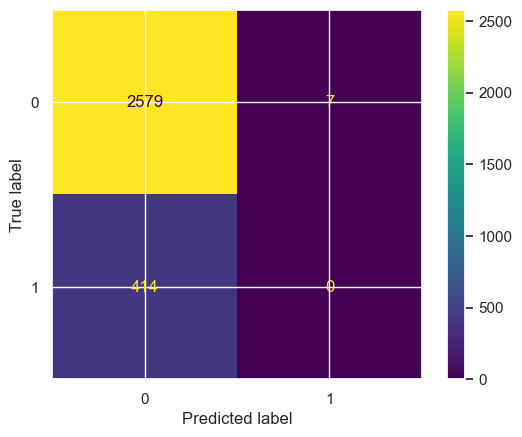

In [1300]:
cm = confusion_matrix(y_test, y_pred)

_ = ConfusionMatrixDisplay(cm).plot()

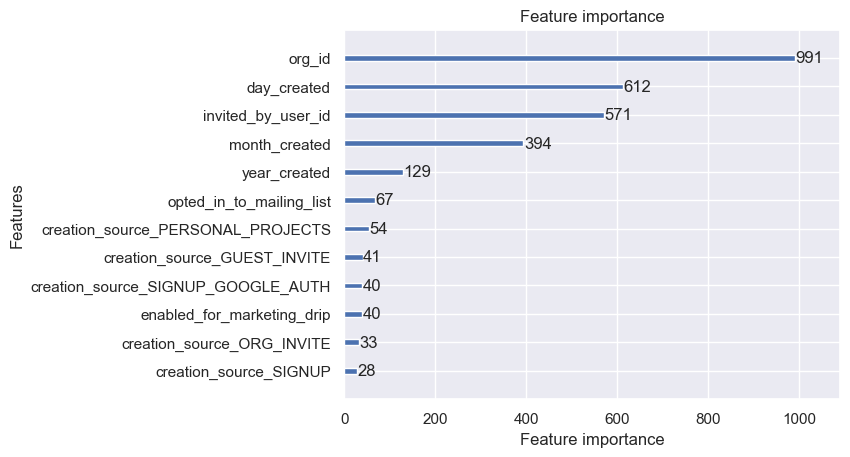

In [1301]:
_ = plot_importance(lgb)

In [1302]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [1303]:
y_pred = rf.predict(X_test)

In [1304]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2586
           1       0.11      0.01      0.02       414

    accuracy                           0.85      3000
   macro avg       0.48      0.50      0.47      3000
weighted avg       0.76      0.85      0.80      3000



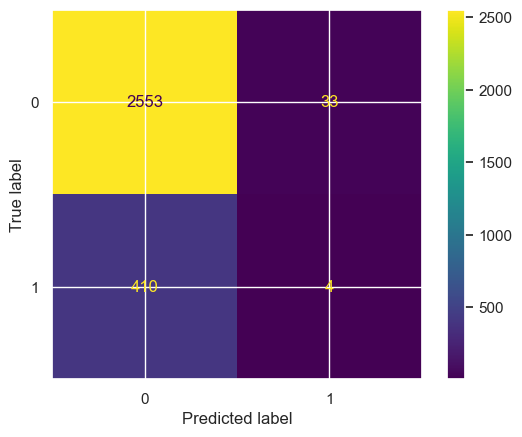

In [1305]:
cm = confusion_matrix(y_test, y_pred)

_ = ConfusionMatrixDisplay(cm).plot()